# STUDENT PERFORMANCE : DATA ANALYSIS

### By Sakshi Jain

Aim: To understand how the student's performance (test scores) is affected by the other variables (Gender, Ethnicity, Parental level of education, Lunch, Test preparation course).

Beginning with the analysis, first we will import all the required libraries of python which will be used in the project.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style('whitegrid')

In [3]:
sp=pd.read_csv('StudentsPerformance.csv')
sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
sp.shape

(1000, 8)

In [5]:
sp.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


From this we can observe that there are no anomalies in the scores. The maximum scores in all subjects are 100 and minimum score for all subjects are different, being zero in maths. All the scores lie between 0 and 100. The mean score in all three subjects is near and almost between 66 to 70.

In [6]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
sp['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [8]:
sp['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [9]:
sp['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

From this we can see clearly that the number of female students is greater than the number of male students.

In [10]:
sp['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [11]:
sp['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

Maximum number of students are from Group C and minimum number of students belong to Group A.

In [12]:
sp['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [13]:
tes= sp.groupby('test preparation course')
tes.mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


Only around one third of the students completed their course before the exam.

Now we will create another column of the average score of the students to study its relation with the different factors.


In [14]:
sp['total score']=sp['math score']+sp['reading score']+sp['writing score']
sp['average total score']=(sp['total score']/300)*100

In [15]:
sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
sp.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
total score                    0
average total score            0
dtype: int64

So, there are no missing values in the given data. We have five columns that are holding categorical data and five that hold numerical values.


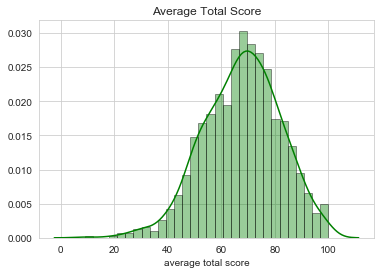

In [17]:
plt.title('Average Total Score')
sns.distplot(sp['average total score'],bins=30,hist_kws=dict(edgecolor="k", linewidth=1),color='green')

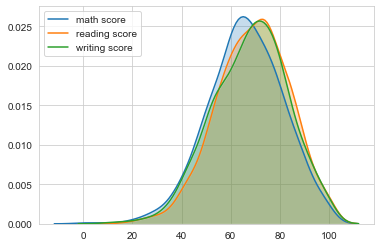

In [18]:
sns.kdeplot(sp['math score'],shade=True)
sns.kdeplot(sp['reading score'],shade=True)
sns.kdeplot(sp['writing score'],shade=True)

Text(0.5, 1.0, 'Writing Score')

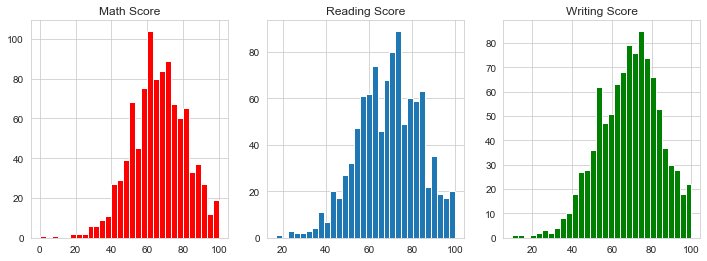

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].hist(data=sp,x='math score',bins=30,color='red')
axes[0].set_title('Math Score')

axes[1].hist(data=sp,x='reading score',bins=30)
axes[1].set_title('Reading Score')

axes[2].hist(data=sp,x='writing score',bins=30,color='green')
axes[2].set_title('Writing Score')

- The average total score of students ranges mostly betweem 50 to 80.
- Maximum number of students have marks between 60 to 80 in all three subjects.
- The students in writing have greater consistency of marks between 60 to 80.

##### Studying relation with gender

Text(0.5, 1.0, 'Average based on gender')

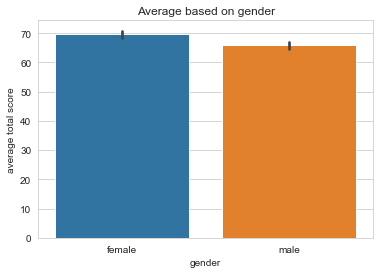

In [20]:
sns.barplot(x='gender',y='average total score',data=sp)
plt.title('Average based on gender')

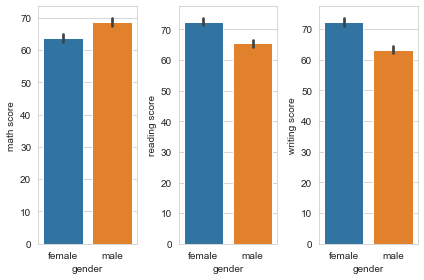

In [21]:
plt.subplot(1,3,1)
sns.barplot(x='gender',y='math score',data=sp)

plt.subplot(1,3,2)
sns.barplot(x='gender',y='reading score',data=sp)

plt.subplot(1,3,3)
sns.barplot(x='gender',y='writing score',data=sp)
plt.tight_layout()

- Gender seems to play a role in terms of student performance. Male students outperform their female counterpart in mathematics
- The average total score of females is greater than that of the males.
- The average marks of females are greater in reading and writing than males.

##### Studying relation with test preparation course

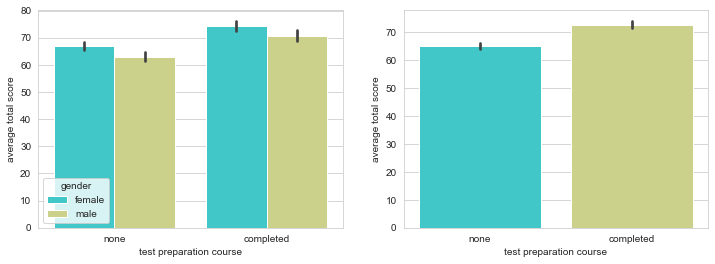

In [22]:
fig = plt.figure(figsize=(12,4))
ax=fig.add_subplot(1,2,1)
sns.barplot(data=sp,x='test preparation course',y='average total score',hue='gender',palette='rainbow')

ax=fig.add_subplot(1,2,2)
sns.barplot(data=sp,x='test preparation course',y='average total score',palette='rainbow')

- As seen earlier, number of students who completed their test preparation course are less than those who didn't. 
-  Also those students who completed their course before the exam have a greater average total score.
-  Among those who completed their course, females have a greater average score than males.
-  From these we can assume that females are more sincere towards studies than males.

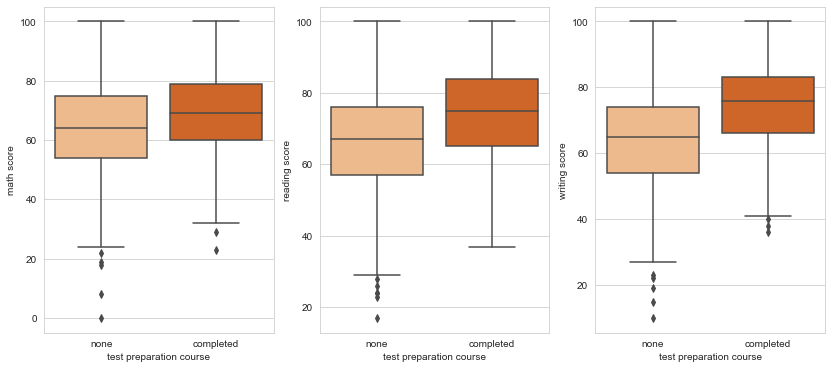

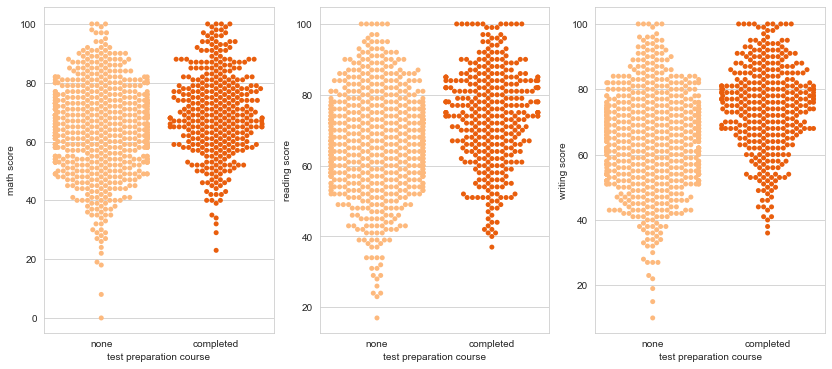

In [23]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 3, 1)
sns.boxplot(x='test preparation course',y='math score',data=sp,palette='Oranges')

ax= fig.add_subplot(1, 3, 2)
sns.boxplot(x='test preparation course',y='reading score',data=sp,palette='Oranges')

ax= fig.add_subplot(1 ,3 ,3)
sns.boxplot(x='test preparation course',y='writing score',data=sp,palette='Oranges')

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 3, 1)
sns.swarmplot(x='test preparation course',y='math score',data=sp,palette='Oranges')

ax= fig.add_subplot(1, 3, 2)
sns.swarmplot(x='test preparation course',y='reading score',data=sp,palette='Oranges')

ax= fig.add_subplot(1 ,3 ,3)
sns.swarmplot(x='test preparation course',y='writing score',data=sp,palette='Oranges')

- From the above plots we can see that on completion of course the marks in all three subjects is increasing. Students who have completed their test preparation course performed better in all 3 areas of exams. 
- However the difference between the marks in math with and without completion of course has slightly less difference as compared to other subjects. This tells us that students need to put in greater efforts in math from the beginning.

##### Studying relation with race/ethnicity

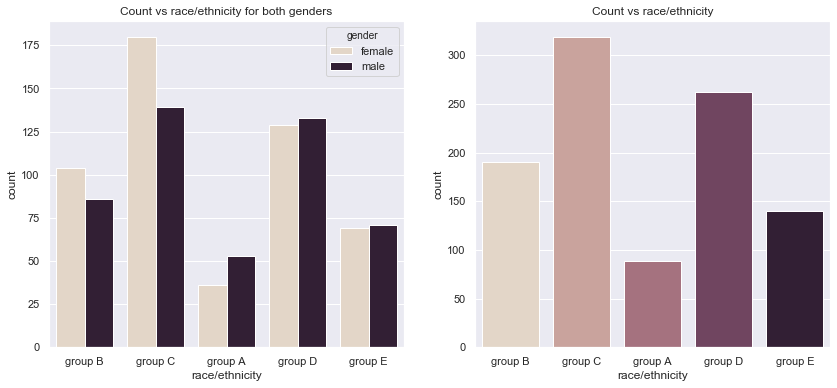

In [24]:
sns.set(style='darkgrid')
fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(1, 2, 1)
plt.title('Count vs race/ethnicity for both genders')
sns.countplot(x='race/ethnicity',data=sp,palette='ch:.2',hue='gender')

ax = fig.add_subplot(1, 2, 2)
plt.title('Count vs race/ethnicity')
sns.countplot(data=sp,x='race/ethnicity',palette='ch:.2')

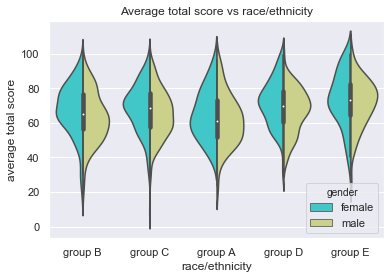

In [25]:
plt.title('Average total score vs race/ethnicity')
sns.violinplot(x='race/ethnicity',y='average total score',palette='rainbow',data=sp,hue='gender',split=True)

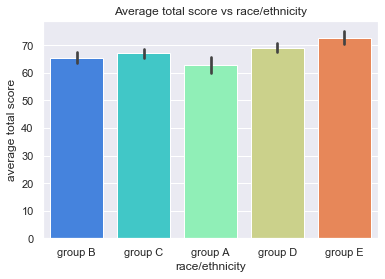

In [26]:
plt.title('Average total score vs race/ethnicity')
sns.barplot(x='race/ethnicity',y='average total score',palette='rainbow',data=sp)

-  The maximum number of students belong to group C and minimum from group A. This shows that group C has greater awareness about importance of education.
-  The number of female students in group B and C are greater than male students. The count of male and female students are almost equal in group E and D. This shows females are being given equal opprtunities as males.
-  Performance of group E is the best from which we can assume that it has got a lot of potential students.This urges the requirement to promote more students into academics from the group. 
-  Performance of females is at par with the males in all the groups.

##### Studying relation with parental level of education

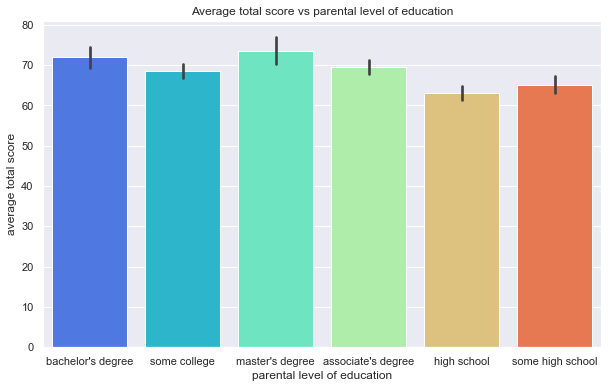

In [27]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
plt.title("Average total score vs parental level of education")
sns.barplot(data=sp,x='parental level of education',y='average total score',palette='rainbow')

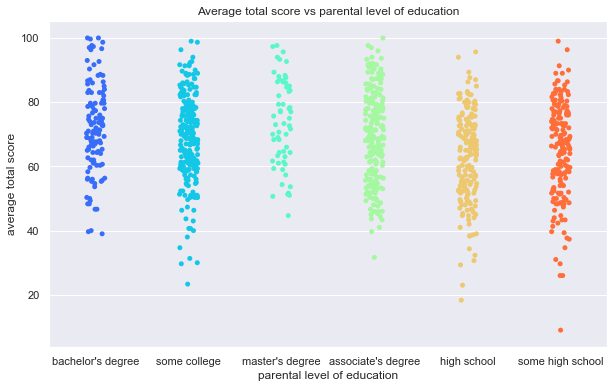

In [28]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
plt.title("Average total score vs parental level of education")
sns.stripplot(data=sp,x='parental level of education',y='average total score',palette='rainbow')

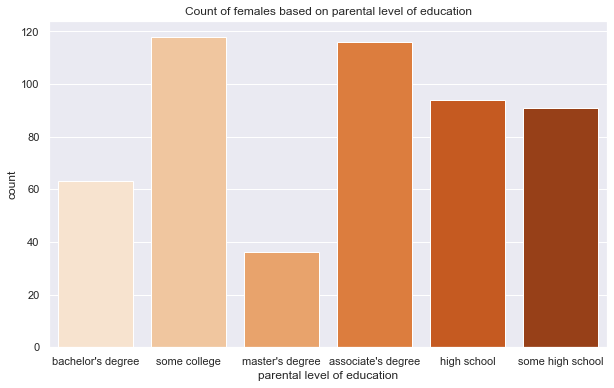

In [29]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
plt.title('Count of females based on parental level of education')
sns.countplot(sp[sp['gender']=='female']['parental level of education'],data=sp,palette='Oranges')

-  From the graphs it is quite clear that the more post high-school education the parent has received, the better their child performs on these tests. 
- Those children with their parents having school level education have relatively lower overall percentage. The seriousness in studies of a student depends on the parental background of education.
-  We can assume that students coming from families with financial hardships, on average, have lower test scores
-  The count of female students from households where parents have just had some schooling are comparable with the other counts.

##### Studying relation with lunch

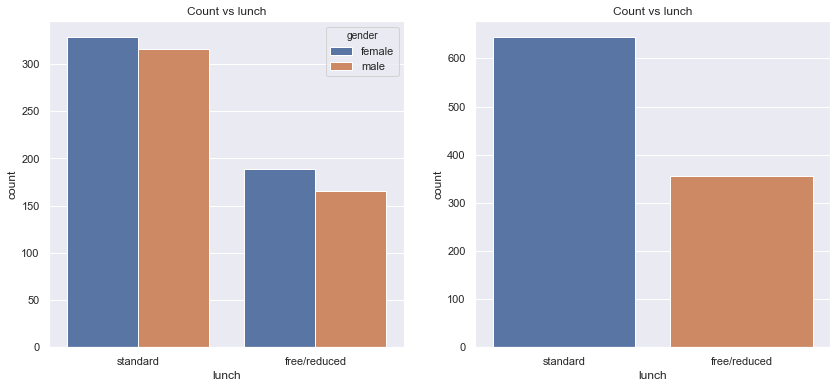

In [30]:
fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(1, 2, 1)
plt.title('Count vs lunch')
sns.countplot(x='lunch',data=sp,hue='gender')

ax = fig.add_subplot(1, 2, 2)
plt.title('Count vs lunch')
sns.countplot(data=sp,x='lunch')

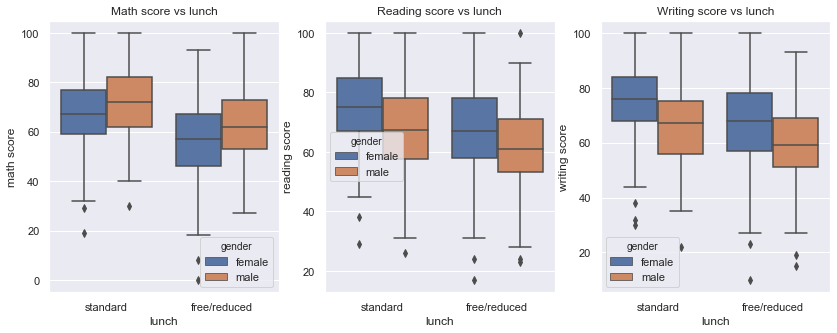

In [31]:
fig = plt.figure(figsize=(14,5))

ax = fig.add_subplot(1, 3, 1)
plt.title("Math score vs lunch")
sns.boxplot(x='lunch',data=sp,y='math score',hue='gender')

ax = fig.add_subplot(1, 3, 2)
plt.title("Reading score vs lunch")
sns.boxplot(x='lunch',data=sp,y='reading score',hue='gender')

ax = fig.add_subplot(1, 3, 3)
plt.title("Writing score vs lunch")
sns.boxplot(x='lunch',data=sp,y='writing score',hue='gender')

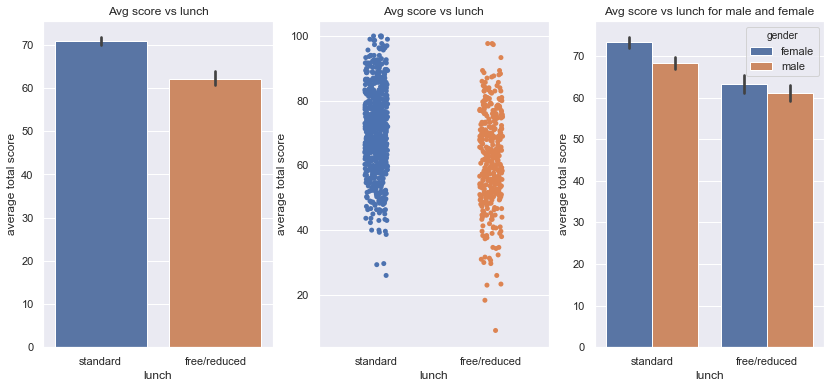

In [32]:
fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(1, 3, 1)
plt.title('Avg score vs lunch')
sns.barplot(x='lunch',data=sp,y='average total score')

ax = fig.add_subplot(1, 3, 2)
plt.title('Avg score vs lunch')
sns.stripplot(data=sp,x='lunch',y='average total score')

ax = fig.add_subplot(1, 3, 3)
plt.title('Avg score vs lunch for male and female')
sns.barplot(x='lunch',data=sp,hue='gender',y='average total score')

-  We can assume that only students who demonstrate financial need are able to get free/reduced price lunches.
-  Students from standard lunch category are greater than the free/reduced price category 
-  Number of females in both free/reduced price category and the stadard category is greater than the males.
-  On an average, the students who are in this program have lower average test scores than those who do not demonstrate this financial need. Their performance in all three areas in poor as compared to the standard category students. 


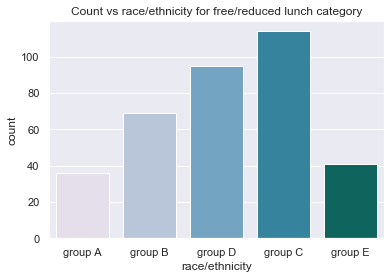

In [33]:
plt.title('Count vs race/ethnicity for free/reduced lunch category')
sns.countplot(sp[sp['lunch']=='free/reduced']['race/ethnicity'],data=sp,palette='PuBuGn')

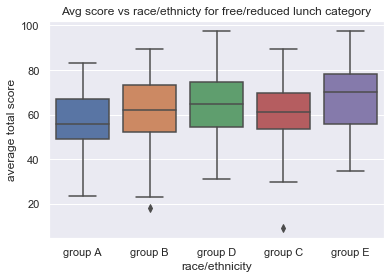

In [34]:
plt.title('Avg score vs race/ethnicty for free/reduced lunch category')
sns.boxplot(sp[sp['lunch']=='free/reduced']['race/ethnicity'],'average total score',data=sp)

Most students taking the free reduced lunch program belong to the group C and minimum from group A which can give us some information about the background of these groups. From the boxplot we can observe that the highest median average score belongs to the group E of these students.

##### Studying relation between scores

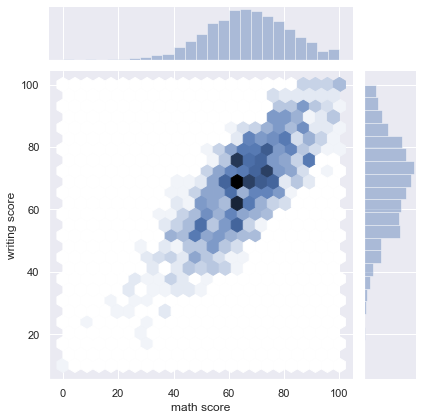

In [35]:
sns.jointplot(x='math score',y='writing score',data=sp,kind='hex')

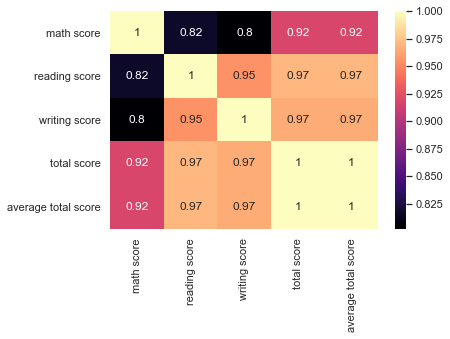

In [36]:
sns.heatmap(sp.corr(),cmap='magma',annot=True)

We can see a huge correlation between writing and reading score which means that predicting reading or writing by using either one of them is quite easy. Good writing skills can also play a role in math score.

In [37]:
sp['total score']=sp['math score']+sp['writing score']+sp['reading score']
sp['result']=np.where(sp['total score']<99,'Fail','Pass')
sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average total score,result
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,Pass
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,Pass
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,Pass
4,male,group C,some college,standard,none,76,78,75,229,76.333333,Pass


In [38]:
sp['result'].value_counts()

Pass    985
Fail     15
Name: result, dtype: int64

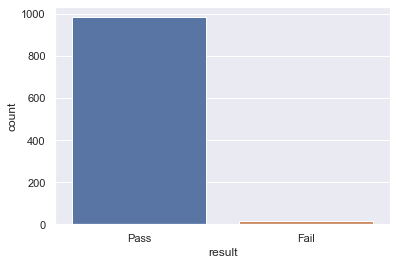

In [39]:
sns.countplot(x='result',data=sp)

Considering the criteria for failing to be total score less than 33%, The number of students who failed are much less than those who didn't.

Also here we can see some pairplots for more understanding.

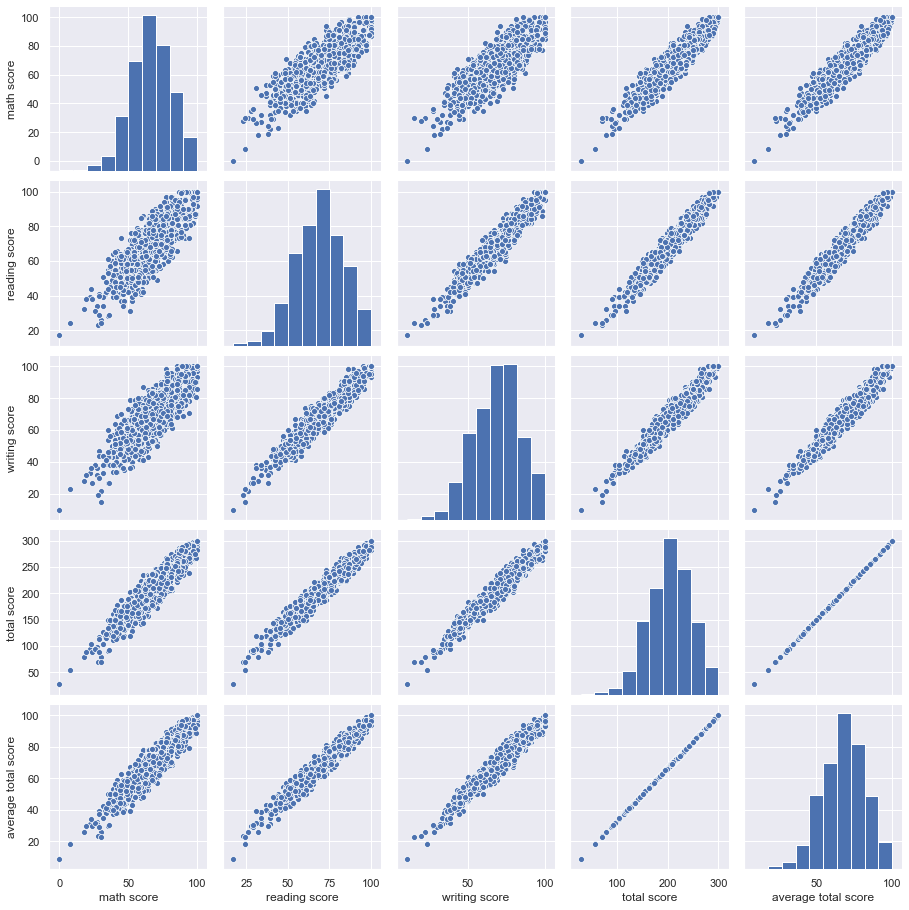

In [40]:
sns.pairplot(sp)

### Conclusions:


In conclusion, based on my analysis, I think there is a relationship between marks and the gender. Females overall performance outweighs males, however in math their performance is lower. Financial situations and conditions also affect the scores. Students from families with poor financial health have lower scores. Larger number of female students conveys the increasing awareness among people for encouraging women into education. Talking of race\ethnicity, best performance is potrayed by group E and lowest by group A.

Data concerned with prior test preparation shows that students who complete the course display better results, however a greater practice in math is required. Good writing helps in good math. So students should aim at completing course material and plan accordingly. Parental level of education also plays a role in student scores. Students whose parents have had post high school education have a better performance. This shows parental education background acts as a source of inspiration for students to achieve better. Students should always be reminded about the importance of education and should constantly be motivated. 

Afterall scores will always depend on the amount of hard work one puts in, so keep working and keep achieving!